# Behaviour analysis of bonsai VR

In [79]:
from aeon.io.reader import Csv, Reader
import aeon.io.api as aeon
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import importlib as imp
import parse_bonsai_functions
imp.reload(parse_bonsai_functions)

<module 'parse_bonsai_functions' from '/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py'>

## Parse mouse and date info into root session folder

In [38]:
mouse_id = "011"
date = "20251203"
root = "/Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/"
session_path = parse_bonsai_functions.find_base_path(mouse_id, date, root)

Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-011/ses-full036_date-20251203T155444


## Load all the relevant files
- settings (session and rig)
- events (odour phases)
- licks
- rewards
- position
- speed
- (analog data for precise timing)
- (optional cameras)

In [39]:
ses_settings, ses_rig_settings = parse_bonsai_functions.load_settings(session_path)

Save all event logs into pandas dataframe

In [ ]:
sess_dataframe = parse_bonsai_functions.load_data(session_path)
sess_dataframe = parse_bonsai_functions.threshold_lick_speed(sess_dataframe, ses_settings['velocityThreshold'])

In [ ]:
sess_dataframe

Sanity check:

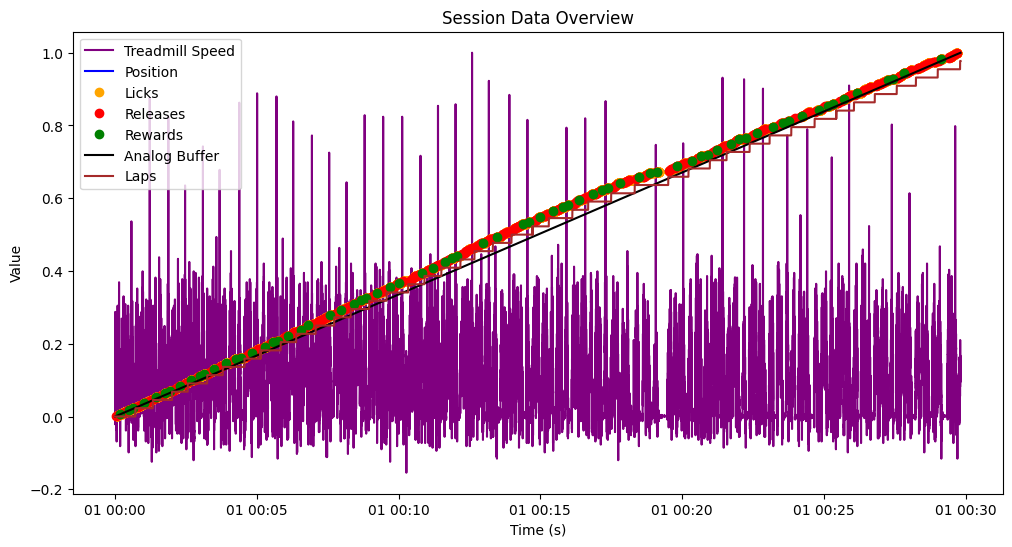

In [41]:
parse_bonsai_functions.plot_ethogram(sess_dataframe,ses_settings)

In [42]:
parse_bonsai_functions.print_sess_summary(sess_dataframe,ses_settings)

Session Summary:
Total Licks: 6208
Total Landmarks: 431
Total Rewards: 73
Hit Rate: 90.17%, False Alarm Rate: 8.91%, D-prime: 1.97
Targets Licked: 156 of 173, Distractors Licked: 23 of 258
rewarded odours: ['odour18' 'odour19' 'odour14' 'odour4'], rewarded textures: ['light_squares' 'waves' 'logs' 'dark_squares']
non-rewarded odours: ['odour1' 'odour11' 'odour12' 'odour13' 'odour17' 'odour6'], non-rewarded textures: ['dots' 'grass' 'grating1' 'grating2' 'leaves' 'tiles']


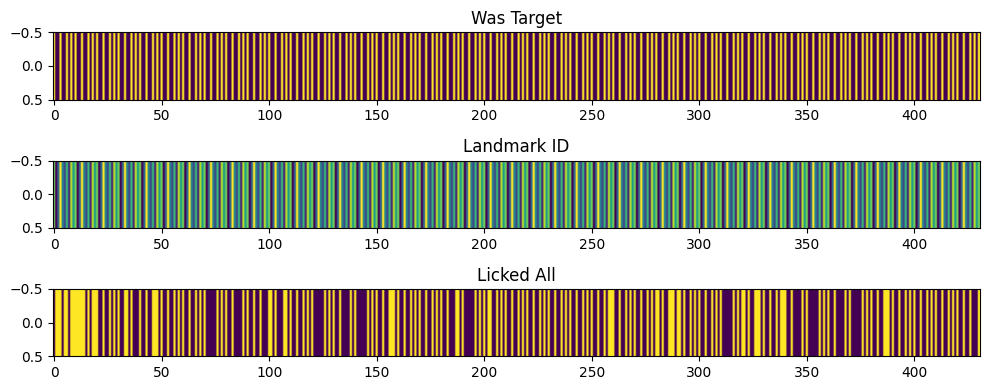

In [43]:
parse_bonsai_functions.plot_lick_lm(sess_dataframe,ses_settings)

## 2LM and 3LM training stages

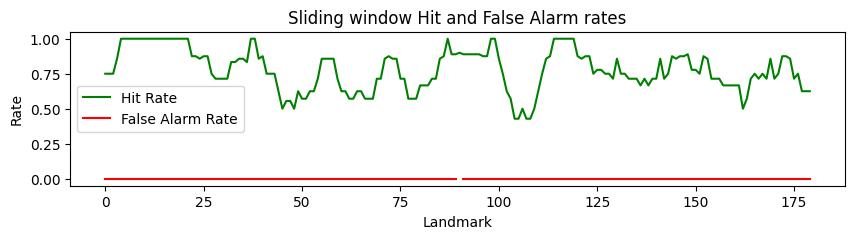

In [8]:
parse_bonsai_functions.plot_sw_hit_fa(sess_dataframe,ses_settings,window=10)

## Random world plots
For ABC sequencing for now

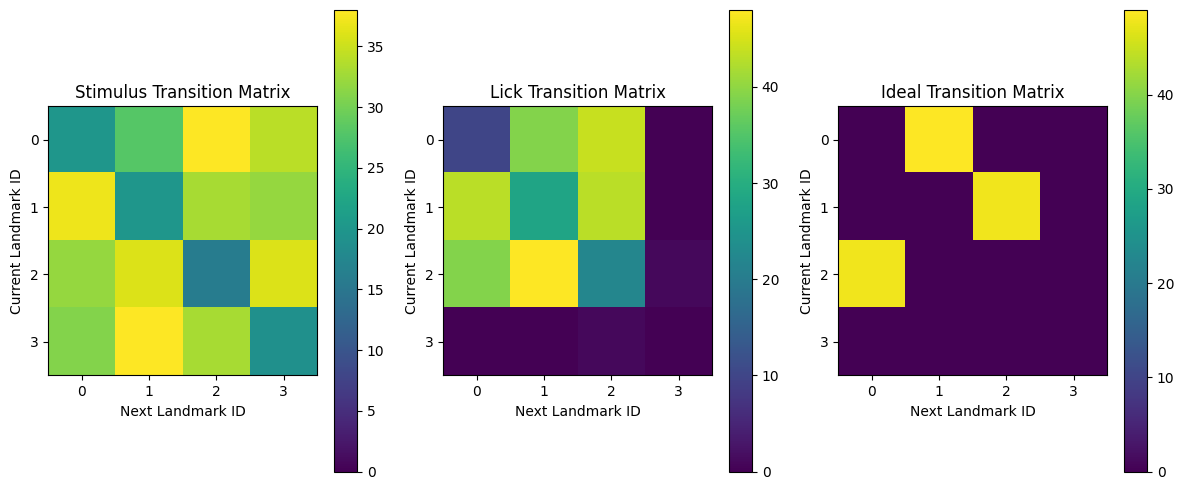

In [34]:
parse_bonsai_functions.plot_transition_matrix(sess_dataframe,ses_settings)

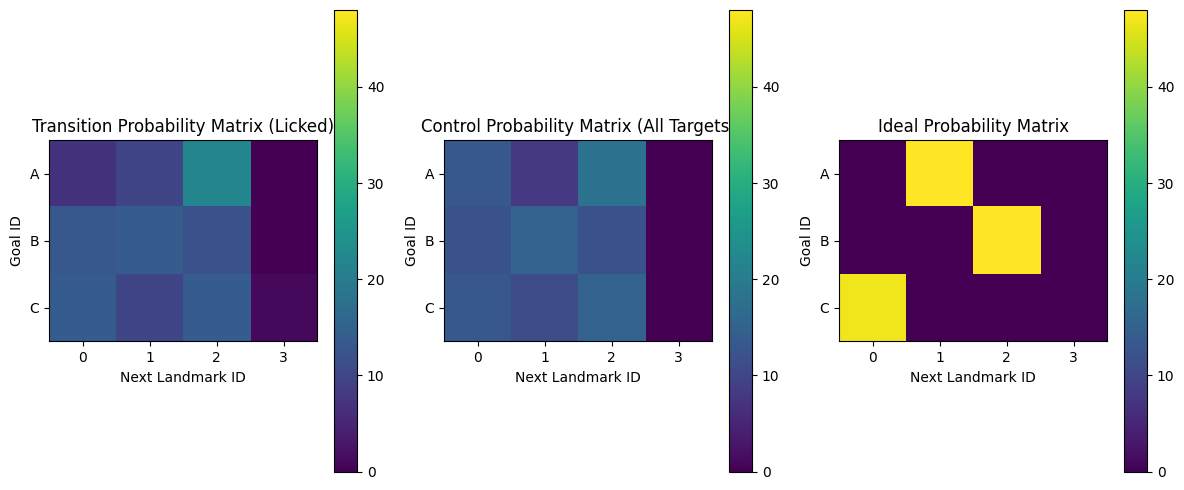

In [35]:
parse_bonsai_functions.plot_conditional_matrix(sess_dataframe,ses_settings)

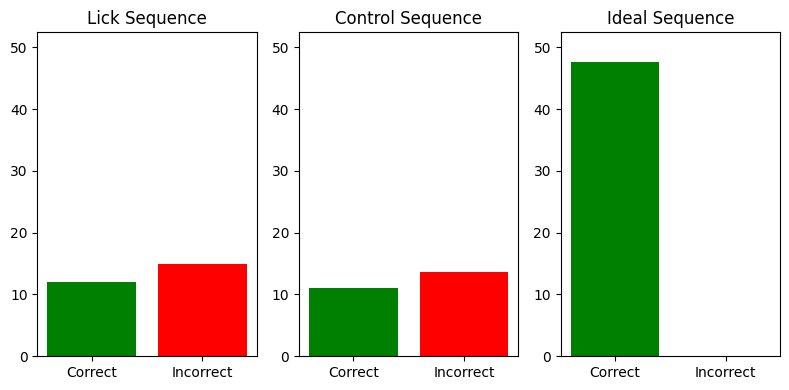

In [36]:
parse_bonsai_functions.plot_sequencing_ABC(sess_dataframe,ses_settings)

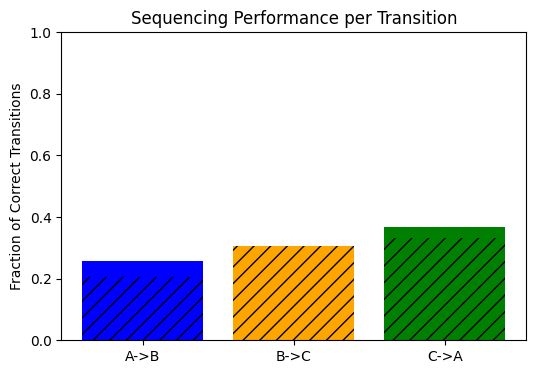

Sequencing Performance: 31.08%
Control Performance: 28.21%


0.3108412055780477

In [37]:
parse_bonsai_functions.plot_seq_fraction(sess_dataframe,ses_settings,test='control') 
# test can be 'transition' (actual performance) or 'control' (licked at all targets) or 'ideal' (licked perfectly in sequence)

## Stable world plots

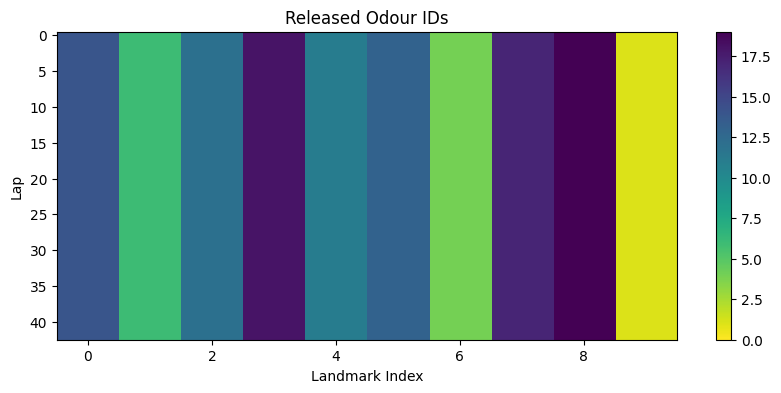

In [44]:
parse_bonsai_functions.sanity_check_parsing(sess_dataframe, ses_settings)

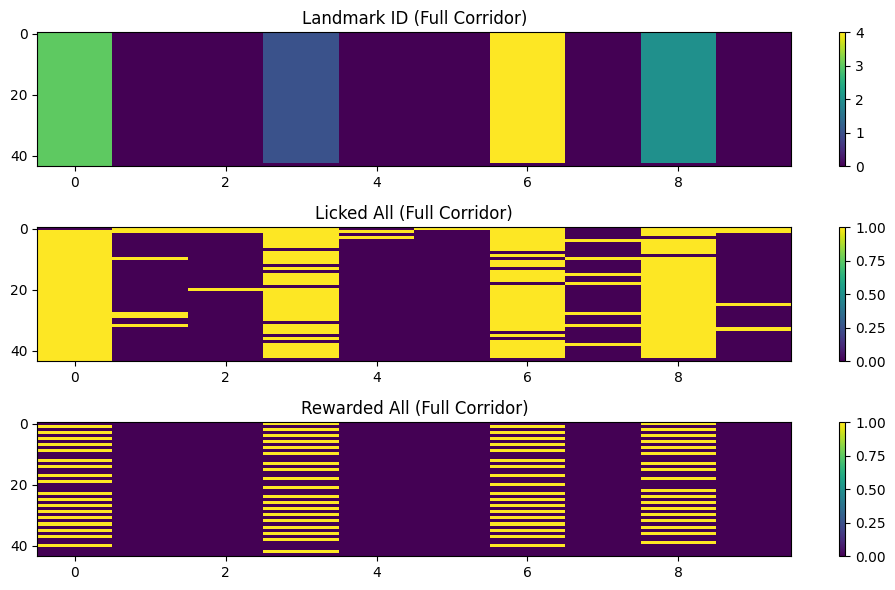

In [82]:
parse_bonsai_functions.plot_full_corr(sess_dataframe,ses_settings)

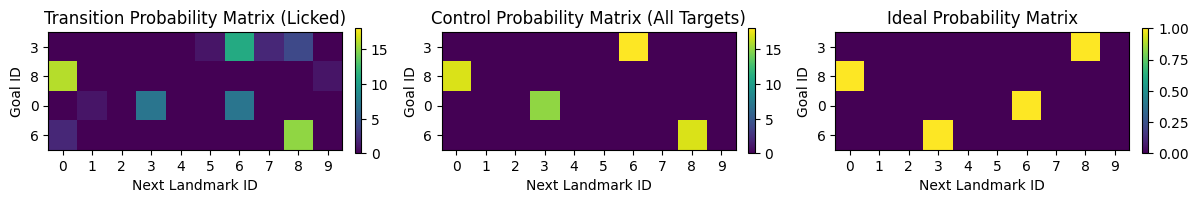

In [46]:
parse_bonsai_functions.plot_stable_conditional_matrix(sess_dataframe,ses_settings)

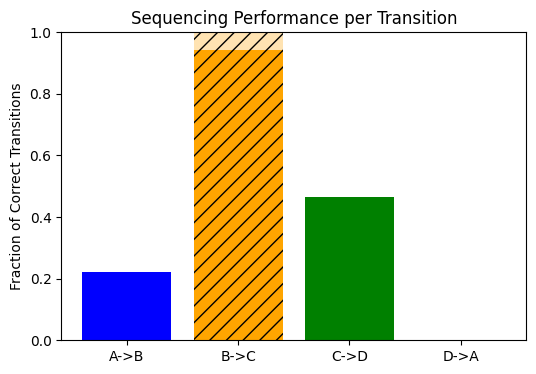

Sequencing Performance: 40.75%, (22.22%, 94.12%, 46.67%, 0.00%)
Control Performance: 25.00%, (0.00%, 100.00%, 0.00%, 0.00%)


In [47]:
parse_bonsai_functions.plot_stable_seq_fraction(sess_dataframe,ses_settings,test='transition')

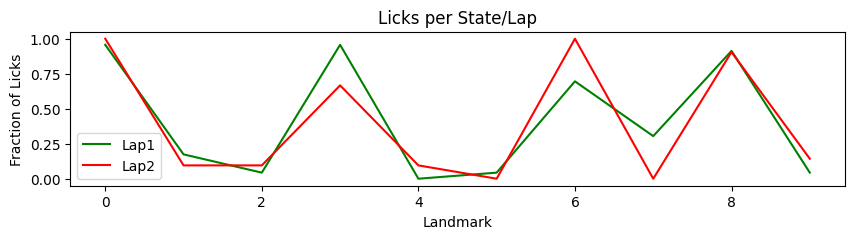

In [48]:
parse_bonsai_functions.plot_licks_per_state(sess_dataframe, ses_settings)

/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:969: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  speed_per_lap = sess_dataframe['Treadmill'][lap_idx]
/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:970: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lap_positions = sess_dataframe['Position'][lap_idx] - sess_dataframe['Position'][lap_idx].min()


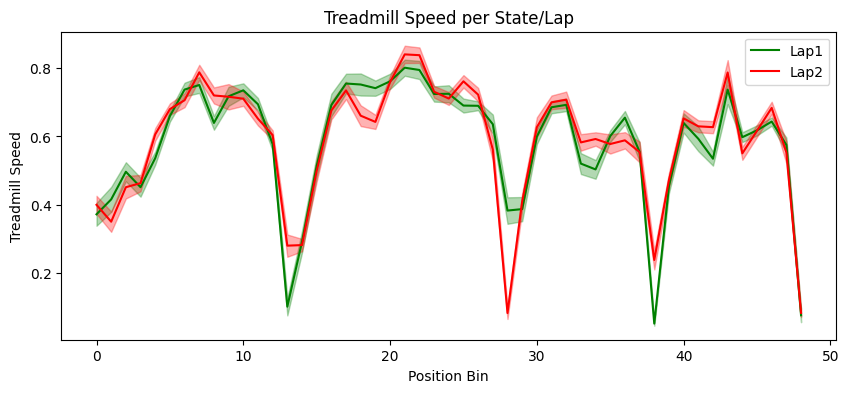

In [49]:
parse_bonsai_functions.plot_speed_per_state(sess_dataframe, ses_settings)

Average Switch-Stay Ratio: 0.20


/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:1093: RuntimeWarning: Mean of empty slice
  sw_state_ratio = np.nanmean([sw_state_ratio_a,sw_state_ratio_b,sw_state_ratio_c,sw_state_ratio_d],axis=0)


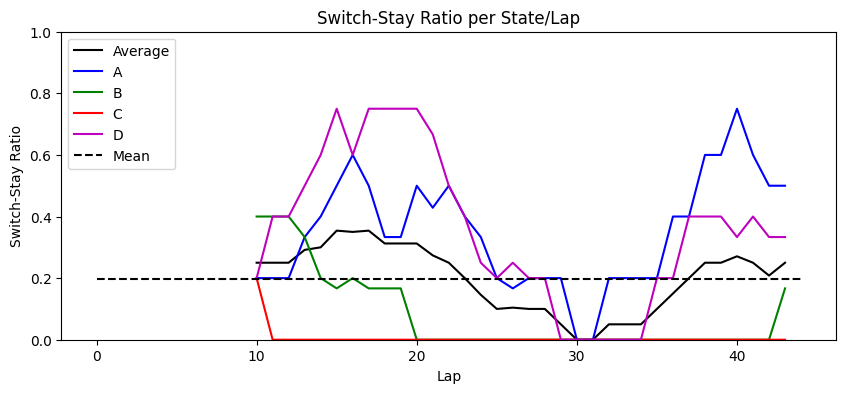

In [50]:
parse_bonsai_functions.plot_sw_state_ratio(sess_dataframe, ses_settings)